# Simple Linear Regression

## Objectives

After completing this lab you will be able to:

*   Use scikit-learn to implement simple Linear Regression
*   Create a model, train it, test it and use the model


### Importing Needed packages


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Read the Data

In [10]:
#Read the data frame
pd.set_option('display.max_columns', None)
df = pd.read_csv("data/FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


**Did you know?** When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)


## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


### Data Exploration

Let's first have a descriptive exploration on our data.


In [3]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Let's select some features to explore more.


In [12]:
a = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
a.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


We can plot each of these features:


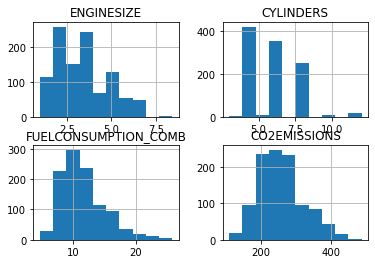

In [15]:
a.hist()
plt.show()

## Check for Linearity

Now, let's plot each of these features against the Emission, to see how linear their relationship is:

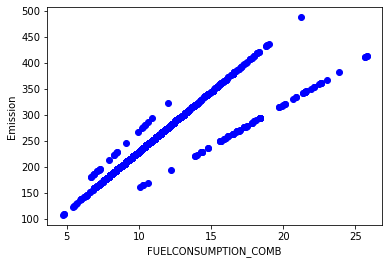

In [16]:
plt.scatter(a.FUELCONSUMPTION_COMB, a.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

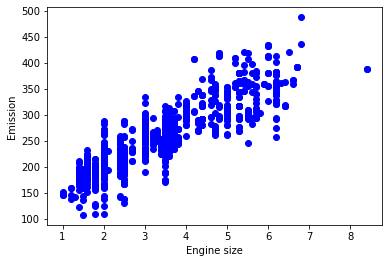

In [17]:
plt.scatter(a.ENGINESIZE, a.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Plot **CYLINDER** vs the Emission, to see how linear is their relationship is:

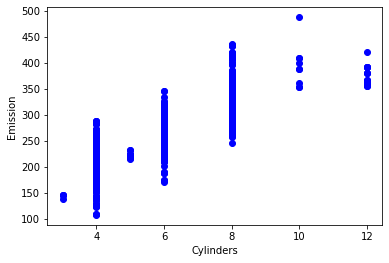

In [18]:
# write your code here
plt.scatter(a.CYLINDERS, a.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()


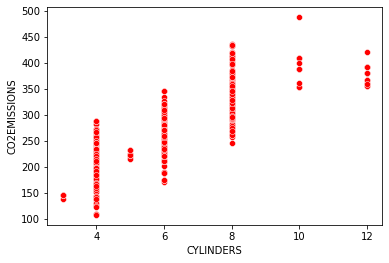

In [19]:
sns.scatterplot(data=a, x='CYLINDERS', y='CO2EMISSIONS', color='red')
plt.show()

## **Creating train and test dataset**

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using **np.random.rand()** function:

In [23]:
# msk = np.random.rand(len(df)) < 0.8
# train = cdf[msk]
# test = cdf[~msk]

In [56]:
X = a['ENGINESIZE']
y = a['CO2EMISSIONS']

In [57]:
from sklearn.model_selection import train_test_split

#Use tuple unpacking to derive our X_train, X_test, y_train, y_test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### 

## **Simple Regression Model**

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value `y` in the dataset, and the predicted value `y_p` using linear approximation.


#### Train data distribution


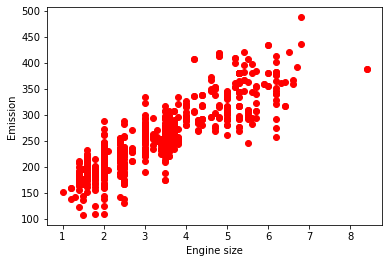

In [58]:
plt.scatter(X_train, y_train,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

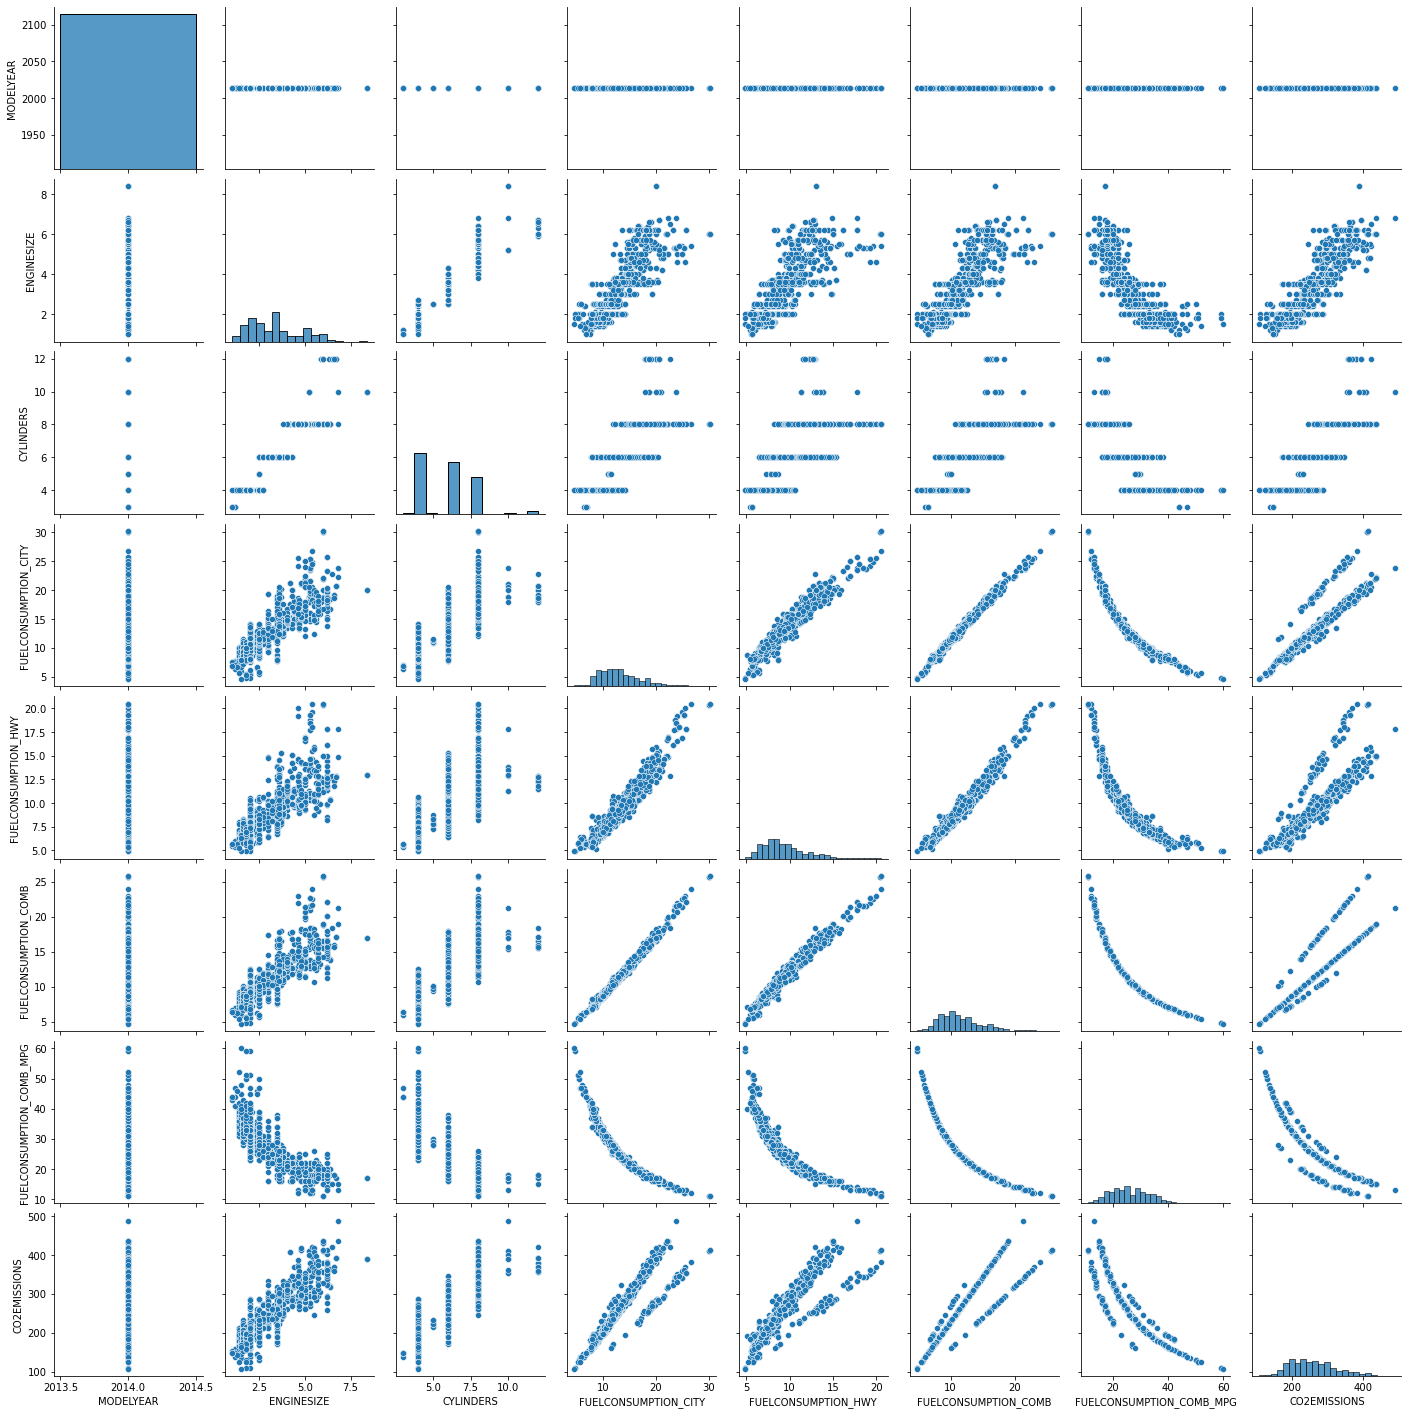

In [160]:
sns.pairplot(df)

**From the pairplot, it can be seen that the Engine size is highly correlated with the CO2EMISSION**

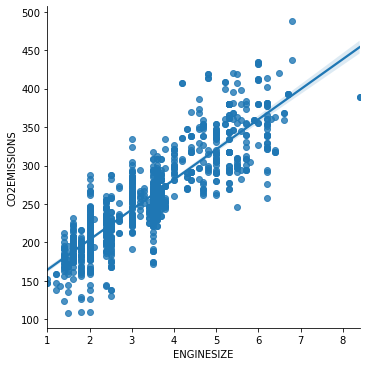

In [162]:
sns.lmplot(data=df, y='CO2EMISSIONS', x='ENGINESIZE')

### **Modeling**

Using the `ENGINESIZE` as the only predictor and the target as `CO2EMISSIONS` 


Using sklearn package to model data.


In [62]:
#import the Linear regression model
from sklearn.linear_model import LinearRegression

#Instantiate the linear regression model
lp = LinearRegression()

#Fit the model
X_train = np.asanyarray(X_train).reshape(-1, 1)
y_train = np.asanyarray(y_train).reshape(-1, 1)

lp.fit(X_train, y_train)

LinearRegression()

In [96]:
#Output the parameters (Intercept and Coefficients)

#print('Intercept: {0}, Coefficient: {1}'.format(lp.intercept_, lp.coef_))
print ('Coefficients: ', lp.coef_)
print ('Intercept: ',lp.intercept_)

Coefficients:  [[39.54528514]]
Intercept:  [124.21113372]


As mentioned before, **Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line.
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.
Notice that all of the data must be available to traverse and calculate the parameters.


### **Plot outputs**


We can plot the fit line over the data:


In [99]:
#predicted y using the parameters: y = (coef_ * X) + intercept_
y_pred = lp.coef_[0][0]*X_train + lp.intercept_[0]

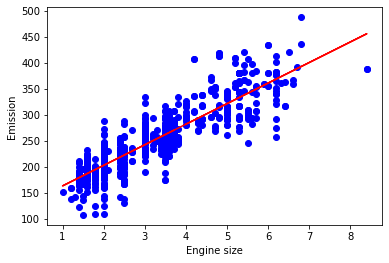

In [101]:
#plotting the training data
plt.scatter(X_train, y_train,  color='blue')

#Plotting the fit line over the training data 
plt.plot(X_train, y_pred, '-r')

plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Predictions

In [110]:
X_test = np.asanyarray(X_test).reshape(-1, 1)

#Predicting values off of the X_test
predict = lp.predict(X_test)

In [111]:
y_test = np.asanyarray(y_test).reshape(-1, 1)

In [ ]:
# how far off are the predicted y from the test set y

<function matplotlib.pyplot.show(close=None, block=None)>

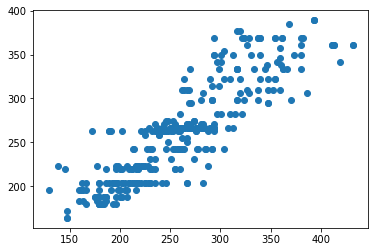

In [113]:
plt.scatter(y_test, predict)
plt.show

### **Create Histogram of distributions of our residuals**

<AxesSubplot:ylabel='Count'>

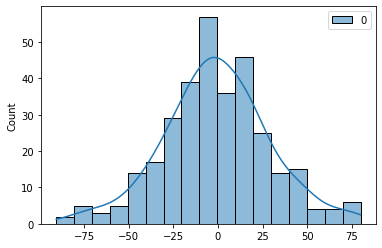

In [145]:
sns.histplot((y_test-predict), kde=True)

**Residiuals seem to be normally distributed showing that the model was a good choice for our data**

### **Evaluation**

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [132]:
from sklearn import metrics

print('Mean Absolute Error (MAE): {}'. format(metrics.mean_absolute_error(y_test, predict)))
print('Mean Square Error (MSE): {}'. format(metrics.mean_squared_error(y_test, predict)))
print('Root Mean Square Error (RMSE): {}'. format(np.sqrt(metrics.mean_squared_error(y_test, predict))))
print('R2-score: %.2f' % metrics.r2_score(y_test, predict))

Mean Absolute Error (MAE): 22.910906441299236
Mean Square Error (MSE): 886.7348973194679
Root Mean Square Error (RMSE): 29.778094252645985
R2-score: 0.78


#### This model performs fairly well with a R2 score of 0.78. The closer the R2 score gets to 1 , the better the model performs. 

### 

### **USING A MULTIPLE REGRESSION MODEL**

In [163]:
Xm = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
ym = df['CO2EMISSIONS']

In [164]:
from sklearn.model_selection import train_test_split

#Use tuple unpacking to derive our X_train, X_test, y_train, y_test data
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.3, random_state=101)

In [165]:
#import the Linear regression model
from sklearn.linear_model import LinearRegression

#Instantiate the linear regression model
lpm = LinearRegression()

#Fit the model
lpm.fit(Xm_train, ym_train)

LinearRegression()

In [166]:
#Output the parameters (Intercept and Coefficients)

#print('Intercept: {0}, Coefficient: {1}'.format(lp.intercept_, lp.coef_))
print ('Coefficients: ', lpm.coef_)
print ('Intercept: ',lpm.intercept_)

Coefficients:  [10.39066616  7.62073187  9.8485475 ]
Intercept:  63.22795456405808


#### Predicting off the Test Data

In [171]:
prd = lpm.predict(Xm_test)

<function matplotlib.pyplot.show(close=None, block=None)>

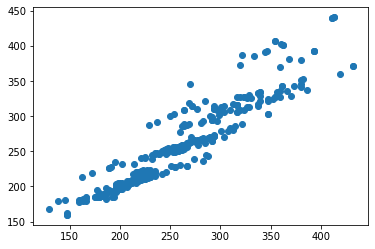

In [172]:
plt.scatter(ym_test, prd)
plt.show

<AxesSubplot:xlabel='CO2EMISSIONS', ylabel='Count'>

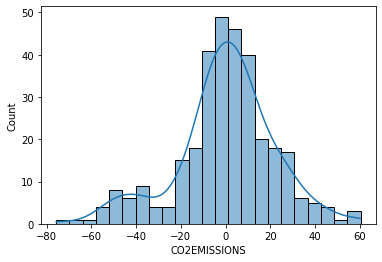

In [173]:
sns.histplot((ym_test-prd), kde=True)

## Evaluation

In [174]:
from sklearn import metrics

print('Mean Absolute Error (MAE): {}'. format(metrics.mean_absolute_error(ym_test, prd)))
print('Mean Square Error (MSE): {}'. format(metrics.mean_squared_error(ym_test, prd)))
print('Root Mean Square Error (RMSE): {}'. format(np.sqrt(metrics.mean_squared_error(ym_test, prd))))
print('R2-score: %.2f' % metrics.r2_score(ym_test, prd))

Mean Absolute Error (MAE): 16.039517575432743
Mean Square Error (MSE): 477.68232605945457
Root Mean Square Error (RMSE): 21.855944867688848
R2-score: 0.88


**By using the two additional variables: `CYLINDERS` and `FUELCONSUMPTION_COMB`. The model performed better. The R2 score improved from `0.78` to `0.88`**